In [1]:
import pandas as pd
import geopandas as gpd
import fiona

In [2]:
df = pd.read_csv('/home/adelsondias/Downloads/deprivation.csv')
df = df[df['Local Authority District name (2013)'].str.contains('Newcastle')]
df.head()

,LSOA code (2011),LSOA name (2011),Local Authority District code (2013),Local Authority District name (2013),Index of Multiple Deprivation (IMD) Score,Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived),Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs),Income Score (rate),Income Rank (where 1 is most deprived),Income Decile (where 1 is most deprived 10% of LSOAs),...,Indoors Sub-domain Rank (where 1 is most deprived),Indoors Sub-domain Decile (where 1 is most deprived 10% of LSOAs),Outdoors Sub-domain Score,Outdoors Sub-domain Rank (where 1 is most deprived),Outdoors Sub-domain Decile (where 1 is most deprived 10% of LSOAs),Total population: mid 2012 (excluding prisoners),Dependent Children aged 0-15: mid 2012 (excluding prisoners),Population aged 16-59: mid 2012 (excluding prisoners),Older population aged 60 and over: mid 2012 (excluding prisoners),Working age population 18-59/64: for use with Employment Deprivation Domain (excluding prisoners)
18248,E01008294,Newcastle upon Tyne 001A,E08000021,Newcastle upon Tyne,10.341,23787,8,0.065,24530,8,...,31453,10,-0.266,20252,7,1491,272,930,289,962.25
18249,E01008306,Newcastle upon Tyne 001B,E08000021,Newcastle upon Tyne,21.228,13282,5,0.159,11540,4,...,30531,10,-0.529,23893,8,1634,255,827,552,854.25
18250,E01008307,Newcastle upon Tyne 001C,E08000021,Newcastle upon Tyne,34.249,6429,2,0.267,4684,2,...,24048,8,-0.839,27460,9,1070,199,574,297,587.00
18251,E01008308,Newcastle upon Tyne 001D,E08000021,Newcastle upon Tyne,21.753,12898,4,0.139,13581,5,...,18796,6,-0.567,24433,8,1590,310,968,312,1005.75
18252,E01008311,Newcastle upon Tyne 001E,E08000021,Newcastle upon Tyne,6.356,28751,9,0.048,28330,9,...,27282,9,-0.322,21006,7,1808,356,1164,288,1182.75


In [3]:
city = gpd.read_file('/home/adelsondias/Repos/newcastle/air-quality/shape/Lower_Layer_Super_Output_Areas_December_2011_Full_Extent__Boundaries_in_England_and_Wales/Lower_Layer_Super_Output_Areas_December_2011_Full_Extent__Boundaries_in_England_and_Wales.shp')
city = city[city['lsoa11nm'].str.contains('Newcastle upon Tyne')]
city = city.to_crs(fiona.crs.from_epsg(4326))
city.crs = {'init': 'epsg:4326', 'no_defs': True}
city.plot()

In [4]:
dep_df = df.set_index('LSOA name (2011)').join(city.set_index('lsoa11nm'))
dep_df = dep_df.dropna()

In [5]:
dep_df.columns

Index(['LSOA code (2011)', 'Local Authority District code (2013)',
       'Local Authority District name (2013)',
       'Index of Multiple Deprivation (IMD) Score',
       'Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)',
       'Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)',
       'Income Score (rate)', 'Income Rank (where 1 is most deprived)',
       'Income Decile (where 1 is most deprived 10% of LSOAs)',
       'Employment Score (rate)', 'Employment Rank (where 1 is most deprived)',
       'Employment Decile (where 1 is most deprived 10% of LSOAs)',
       'Education, Skills and Training Score',
       'Education, Skills and Training Rank (where 1 is most deprived)',
       'Education, Skills and Training Decile (where 1 is most deprived 10% of LSOAs)',
       'Health Deprivation and Disability Score',
       'Health Deprivation and Disability Rank (where 1 is most deprived)',
       'Health Deprivation and Disability Dec

In [6]:
dep_df = gpd.GeoDataFrame(dep_df[['Index of Multiple Deprivation (IMD) Score',
                'Income Score (rate)',
                'Employment Score (rate)',
                'Education, Skills and Training Score',
                'Crime Score',
                'Living Environment Score',
                'Total population: mid 2012 (excluding prisoners)',
                'lsoa11cd', 'lsoa11nmw','geometry']])
dep_df.head()

,Index of Multiple Deprivation (IMD) Score,Income Score (rate),Employment Score (rate),"Education, Skills and Training Score",Crime Score,Living Environment Score,Total population: mid 2012 (excluding prisoners),lsoa11cd,lsoa11nmw,geometry
LSOA name (2011),,,,,,,,,,
Newcastle upon Tyne 001A,10.341,0.065,0.061,9.190,-1.091,4.301,1491,E01008294,Newcastle upon Tyne 001A,POLYGON ((-1.666689382413588 55.01329695548884...
Newcastle upon Tyne 001B,21.228,0.159,0.152,24.864,-0.953,3.508,1634,E01008306,Newcastle upon Tyne 001B,"POLYGON ((-1.64766724046026 55.07938255874537,..."
Newcastle upon Tyne 001C,34.249,0.267,0.175,32.791,-0.843,6.061,1070,E01008307,Newcastle upon Tyne 001C,POLYGON ((-1.650610801720372 55.07124245464491...
Newcastle upon Tyne 001D,21.753,0.139,0.122,20.990,-1.237,10.646,1590,E01008308,Newcastle upon Tyne 001D,"POLYGON ((-1.63851375840094 55.04158593749585,..."
Newcastle upon Tyne 001E,6.356,0.048,0.057,3.640,-1.488,6.177,1808,E01008311,Newcastle upon Tyne 001E,POLYGON ((-1.653452245550654 55.02474780931615...


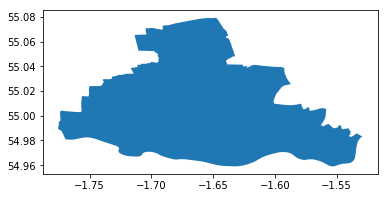

In [20]:
# import geopandas as gpd
# import shapely, fiona
# city = gpd.read_file(configuration__['SHAPE_PATH'])
# city = city[city['msoa11nm'].str.contains('Newcastle upon Tyne')]
# city = city.to_crs(fiona.crs.from_epsg(4326))
# city.crs = {'init': 'epsg:4326', 'no_defs': True}
# city['geometry'].plot()
# city = gpd.GeoDataFrame(geometry=gpd.GeoSeries(shapely.ops.cascaded_union(city['geometry']).exterior))
gpd.GeoDataFrame(geometry=gpd.GeoSeries(shapely.geometry.Polygon(shapely.ops.cascaded_union(city['geometry']).exterior))).plot()

In [1]:
import sys
sys.path.append('/home/adelsondias/Repos/sensingbee/sensingbee')
import source as sb

configuration__ = {
    'DATA_FOLDER':'/home/adelsondias/Repos/newcastle/air-quality/data_1week1/',
    'SHAPE_PATH':'/home/adelsondias/Repos/newcastle/air-quality/shape/Middle_Layer_Super_Output_Areas_December_2011_Full_Extent_Boundaries_in_England_and_Wales/Middle_Layer_Super_Output_Areas_December_2011_Full_Extent_Boundaries_in_England_and_Wales.shp',
    'Sensors__frequency':'D',
    'Sensors__variables': ['NO2','Temperature','PM2.5'],
    'Sensors__threshold_callibration': {'Temperature':25, 'NO2':80, 'PM2.5':15},
    'Geography__filter_column':'msoa11nm',
    'Geography__filter_label':'Newcastle upon Tyne',
    'Geography__meshgrid':{'dimensions':[50,50], 'longitude_range':[-1.8, -1.51], 'latitude_range':[54.96, 55.05]},
    'osm_bbox': '(54.96,-1.8,55.05,-1.51)',
    'osm_line_objs': ['primary','trunk','residential'],
    'osm_point_objs': ['traffic_signals','crossing']
}
# sensors = sb.Sensors(configuration__, mode='make', path=configuration__['DATA_FOLDER'], delimit_quantiles=True)
# geography = sb.Geography(configuration__, 'make', sensors)
# features = sb.Features(configuration__, mode='make', Sensors=sensors, Geography=geography)

                                            geometry
0  POLYGON ((-1.533809831616158 54.97558851156042...
        lon    lat                          geometry
0 -1.800000  54.96                POINT (-1.8 54.96)
1 -1.794082  54.96  POINT (-1.794081632653061 54.96)
2 -1.788163  54.96  POINT (-1.788163265306123 54.96)
3 -1.782245  54.96  POINT (-1.782244897959184 54.96)
4 -1.776327  54.96  POINT (-1.776326530612245 54.96)
NO2
Temperature
PM2.5


In [24]:
features.zx.columns

Index(['NO2', 'NO2', 'NO2', 'NO2', 'NO2', 'd_NO2', 'd_NO2', 'd_NO2', 'd_NO2',
       'd_NO2', 'Temperature', 'Temperature', 'Temperature', 'Temperature',
       'Temperature', 'd_Temperature', 'd_Temperature', 'd_Temperature',
       'd_Temperature', 'd_Temperature', 'PM2.5', 'PM2.5', 'PM2.5', 'PM2.5',
       'PM2.5', 'd_PM2.5', 'd_PM2.5', 'd_PM2.5', 'd_PM2.5', 'd_PM2.5', 'dow',
       'day', 'week', 'primary', 'trunk', 'motorway', 'residential',
       'traffic_signals', 'crossing',
       'Index of Multiple Deprivation (IMD) Score', 'Income Score (rate)',
       'Employment Score (rate)', 'Education, Skills and Training Score',
       'Crime Score', 'Barriers to Housing and Services Score',
       'Living Environment Score',
       'Total population: mid 2012 (excluding prisoners)',
       'Population aged 16-59: mid 2012 (excluding prisoners)'],
      dtype='object')

In [21]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
import numpy as np


it = 21

# with deprivation features (p+u+s+d)
f = features.get_train_features('NO2')
r2 = []
for i in range(1,it):
    m = sb.Model(GradientBoostingRegressor(n_estimators=200, max_depth=5, max_features=0.5)).fit(f['X'], f['y'])
    r2.append(m.r2)
print('[pusd] CV:',np.mean(r2),' ~ std:',np.std(r2))

# with deprivation features (p'+u+s'+d)
f = features.get_train_features('NO2')
X = f['X'][['NO2', 'NO2', 'NO2', 'NO2', 'NO2',
            'Temperature', 'Temperature', 'Temperature', 'Temperature', 'Temperature', 
            'PM2.5', 'PM2.5', 'PM2.5', 'PM2.5', 'PM2.5', 
            'dow', 'day', 'week', 
            'primary', 'trunk', 'motorway', 'residential', 'traffic_signals', 'crossing']]
r2 = []
for i in range(1,it):
    m = sb.Model(GradientBoostingRegressor(n_estimators=200, max_depth=5, max_features=0.5)).fit(X, f['y'])
    r2.append(m.r2)
print('[p\'us\'d] CV:',np.mean(r2),' ~ std:',np.std(r2))

# without deprivation features (p+u+s)
f = features.get_train_features('NO2')
X = f['X'][['NO2', 'NO2', 'NO2', 'NO2', 'NO2', 'd_NO2', 'd_NO2', 'd_NO2', 'd_NO2',
       'd_NO2', 'Temperature', 'Temperature', 'Temperature', 'Temperature',
       'Temperature', 'd_Temperature', 'd_Temperature', 'd_Temperature',
       'd_Temperature', 'd_Temperature', 'PM2.5', 'PM2.5', 'PM2.5', 'PM2.5',
       'PM2.5', 'd_PM2.5', 'd_PM2.5', 'd_PM2.5', 'd_PM2.5', 'd_PM2.5', 'dow',
       'day', 'week', 'primary', 'trunk', 'motorway', 'residential',
       'traffic_signals', 'crossing',]]
r2 = []
for i in range(1,it):
    m = sb.Model(GradientBoostingRegressor(n_estimators=200, max_depth=5, max_features=0.5)).fit(X, f['y'])
    r2.append(m.r2)
print('[pus] CV:',np.mean(r2),' ~ std:',np.std(r2))

# without deprivation features (p+s)
f = features.get_train_features('NO2')
X = f['X'][['NO2', 'NO2', 'NO2', 'NO2', 'NO2', 'd_NO2', 'd_NO2', 'd_NO2', 'd_NO2',
       'd_NO2', 'Temperature', 'Temperature', 'Temperature', 'Temperature',
       'Temperature', 'd_Temperature', 'd_Temperature', 'd_Temperature',
       'd_Temperature', 'd_Temperature', 'PM2.5', 'PM2.5', 'PM2.5', 'PM2.5',
       'PM2.5', 'd_PM2.5', 'd_PM2.5', 'd_PM2.5', 'd_PM2.5', 'd_PM2.5', 'dow',
       'day', 'week']]
r2 = []
for i in range(1,it):
    m = sb.Model(GradientBoostingRegressor(n_estimators=200, max_depth=5, max_features=0.5)).fit(X, f['y'])
    r2.append(m.r2)
print('[ps] CV:',np.mean(r2),' ~ std:',np.std(r2))

[pusd] CV: -0.8528115540692959  ~ std: 1.098734641695324
[p'us'd] CV: -0.6917349116156208  ~ std: 1.4293931697384963
[pus] CV: -1.1113688323085433  ~ std: 1.547605592458382
[ps] CV: -0.9433734816536902  ~ std: 1.4575576447839167


In [23]:
f['X'].columns

Index(['NO2', 'NO2', 'NO2', 'NO2', 'NO2', 'd_NO2', 'd_NO2', 'd_NO2', 'd_NO2',
       'd_NO2', 'Temperature', 'Temperature', 'Temperature', 'Temperature',
       'Temperature', 'd_Temperature', 'd_Temperature', 'd_Temperature',
       'd_Temperature', 'd_Temperature', 'PM2.5', 'PM2.5', 'PM2.5', 'PM2.5',
       'PM2.5', 'd_PM2.5', 'd_PM2.5', 'd_PM2.5', 'd_PM2.5', 'd_PM2.5', 'dow',
       'day', 'week', 'primary', 'trunk', 'motorway', 'residential',
       'traffic_signals', 'crossing',
       'Index of Multiple Deprivation (IMD) Score', 'Income Score (rate)',
       'Employment Score (rate)', 'Education, Skills and Training Score',
       'Crime Score', 'Barriers to Housing and Services Score',
       'Living Environment Score',
       'Total population: mid 2012 (excluding prisoners)',
       'Population aged 16-59: mid 2012 (excluding prisoners)'],
      dtype='object')